## EDA and prediction model fiiting for breast cancer data
1) starting with importing libraries
2) checking data for size ,columns headers and rows for null


In [50]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

In [51]:
## data loading from sklearn
data= load_breast_cancer()


## Basic info about the data
1. The data has 30 columns and 569 rows 
2. no null data im any of the columns is found 
3. It's a copy of UCi ML breast cancer wisconsin(Diagnostic) data set 
4. The data is derive form image of FNA of a breadt mass. they describe characteristic of the cell nuclei present in the image.The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [52]:
## data conversion to dataframe in pandas
## checkign headers
data_df = pd.DataFrame(data = data.data, 
                       columns = data.feature_names) 
data_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
## checking shape 
data_df.shape

(569, 30)

In [54]:
##Checking the nulls in all the columns
data_df[data_df.isna().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


## EDA
1. The description of the features show all the columns are float and target is a int column 
2. Features like mean _are and worst_area there is high variation.
3. There are many variables have median value 0 which means here the values of the features are smaller and almost nearing to zeros amd maximum not even near 1. Also meaning less varition in the data , so low std as well. For example mean smootheness. Also mean is aroung zero in these cases.
4. The area_worst feature’s max value is 4254 and fractal_dimension_se features’ max 0.029840. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.
5. Bar plot of diagnosis shows that 1 = Malignant and 0= Benign patients ratio is 37% (212/569) and 63% (357/569) respectively.

In [55]:
data_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## always standardise numerical variable before analyzing or comparing

In [ ]:
## scaling the features standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data_d['mean_area'] = sc.fit_transform(data_df)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [86]:
pd.DataFrame(data_d, columns=data_df.columns).describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000000,-0.000000,1.000880,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean texture,569.000000,0.000000,1.000880,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean perimeter,569.000000,-0.000000,1.000880,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean area,569.000000,-0.000000,1.000880,-1.454443,-0.667195,-0.295187,0.363507,5.250529
mean smoothness,569.000000,-0.000000,1.000880,-3.112085,-0.710963,-0.034891,0.636199,4.770911
mean compactness,569.000000,0.000000,1.000880,-1.610136,-0.747086,-0.221940,0.493857,4.568425
mean concavity,569.000000,0.000000,1.000880,-1.114873,-0.743748,-0.342240,0.526062,4.243589
mean concave points,569.000000,-0.000000,1.000880,-1.261820,-0.737944,-0.397721,0.646935,3.927930
mean symmetry,569.000000,0.000000,1.000880,-2.744117,-0.703240,-0.071627,0.530779,4.484751
mean fractal dimension,569.000000,0.000000,1.000880,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [56]:
### summary statistics for all the columns
data_df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
mean texture,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
mean perimeter,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
mean area,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
mean smoothness,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
mean compactness,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
mean concavity,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
mean concave points,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
mean symmetry,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
mean fractal dimension,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


1)  Skewness could be left or right . Righlt skewed is positively skewd , tail on right side distribution is longer.
left side of distribution is longer than tail on the right side
2) positive skewness = mean >median>mode
3)  negative skewness =  mode>median>mean

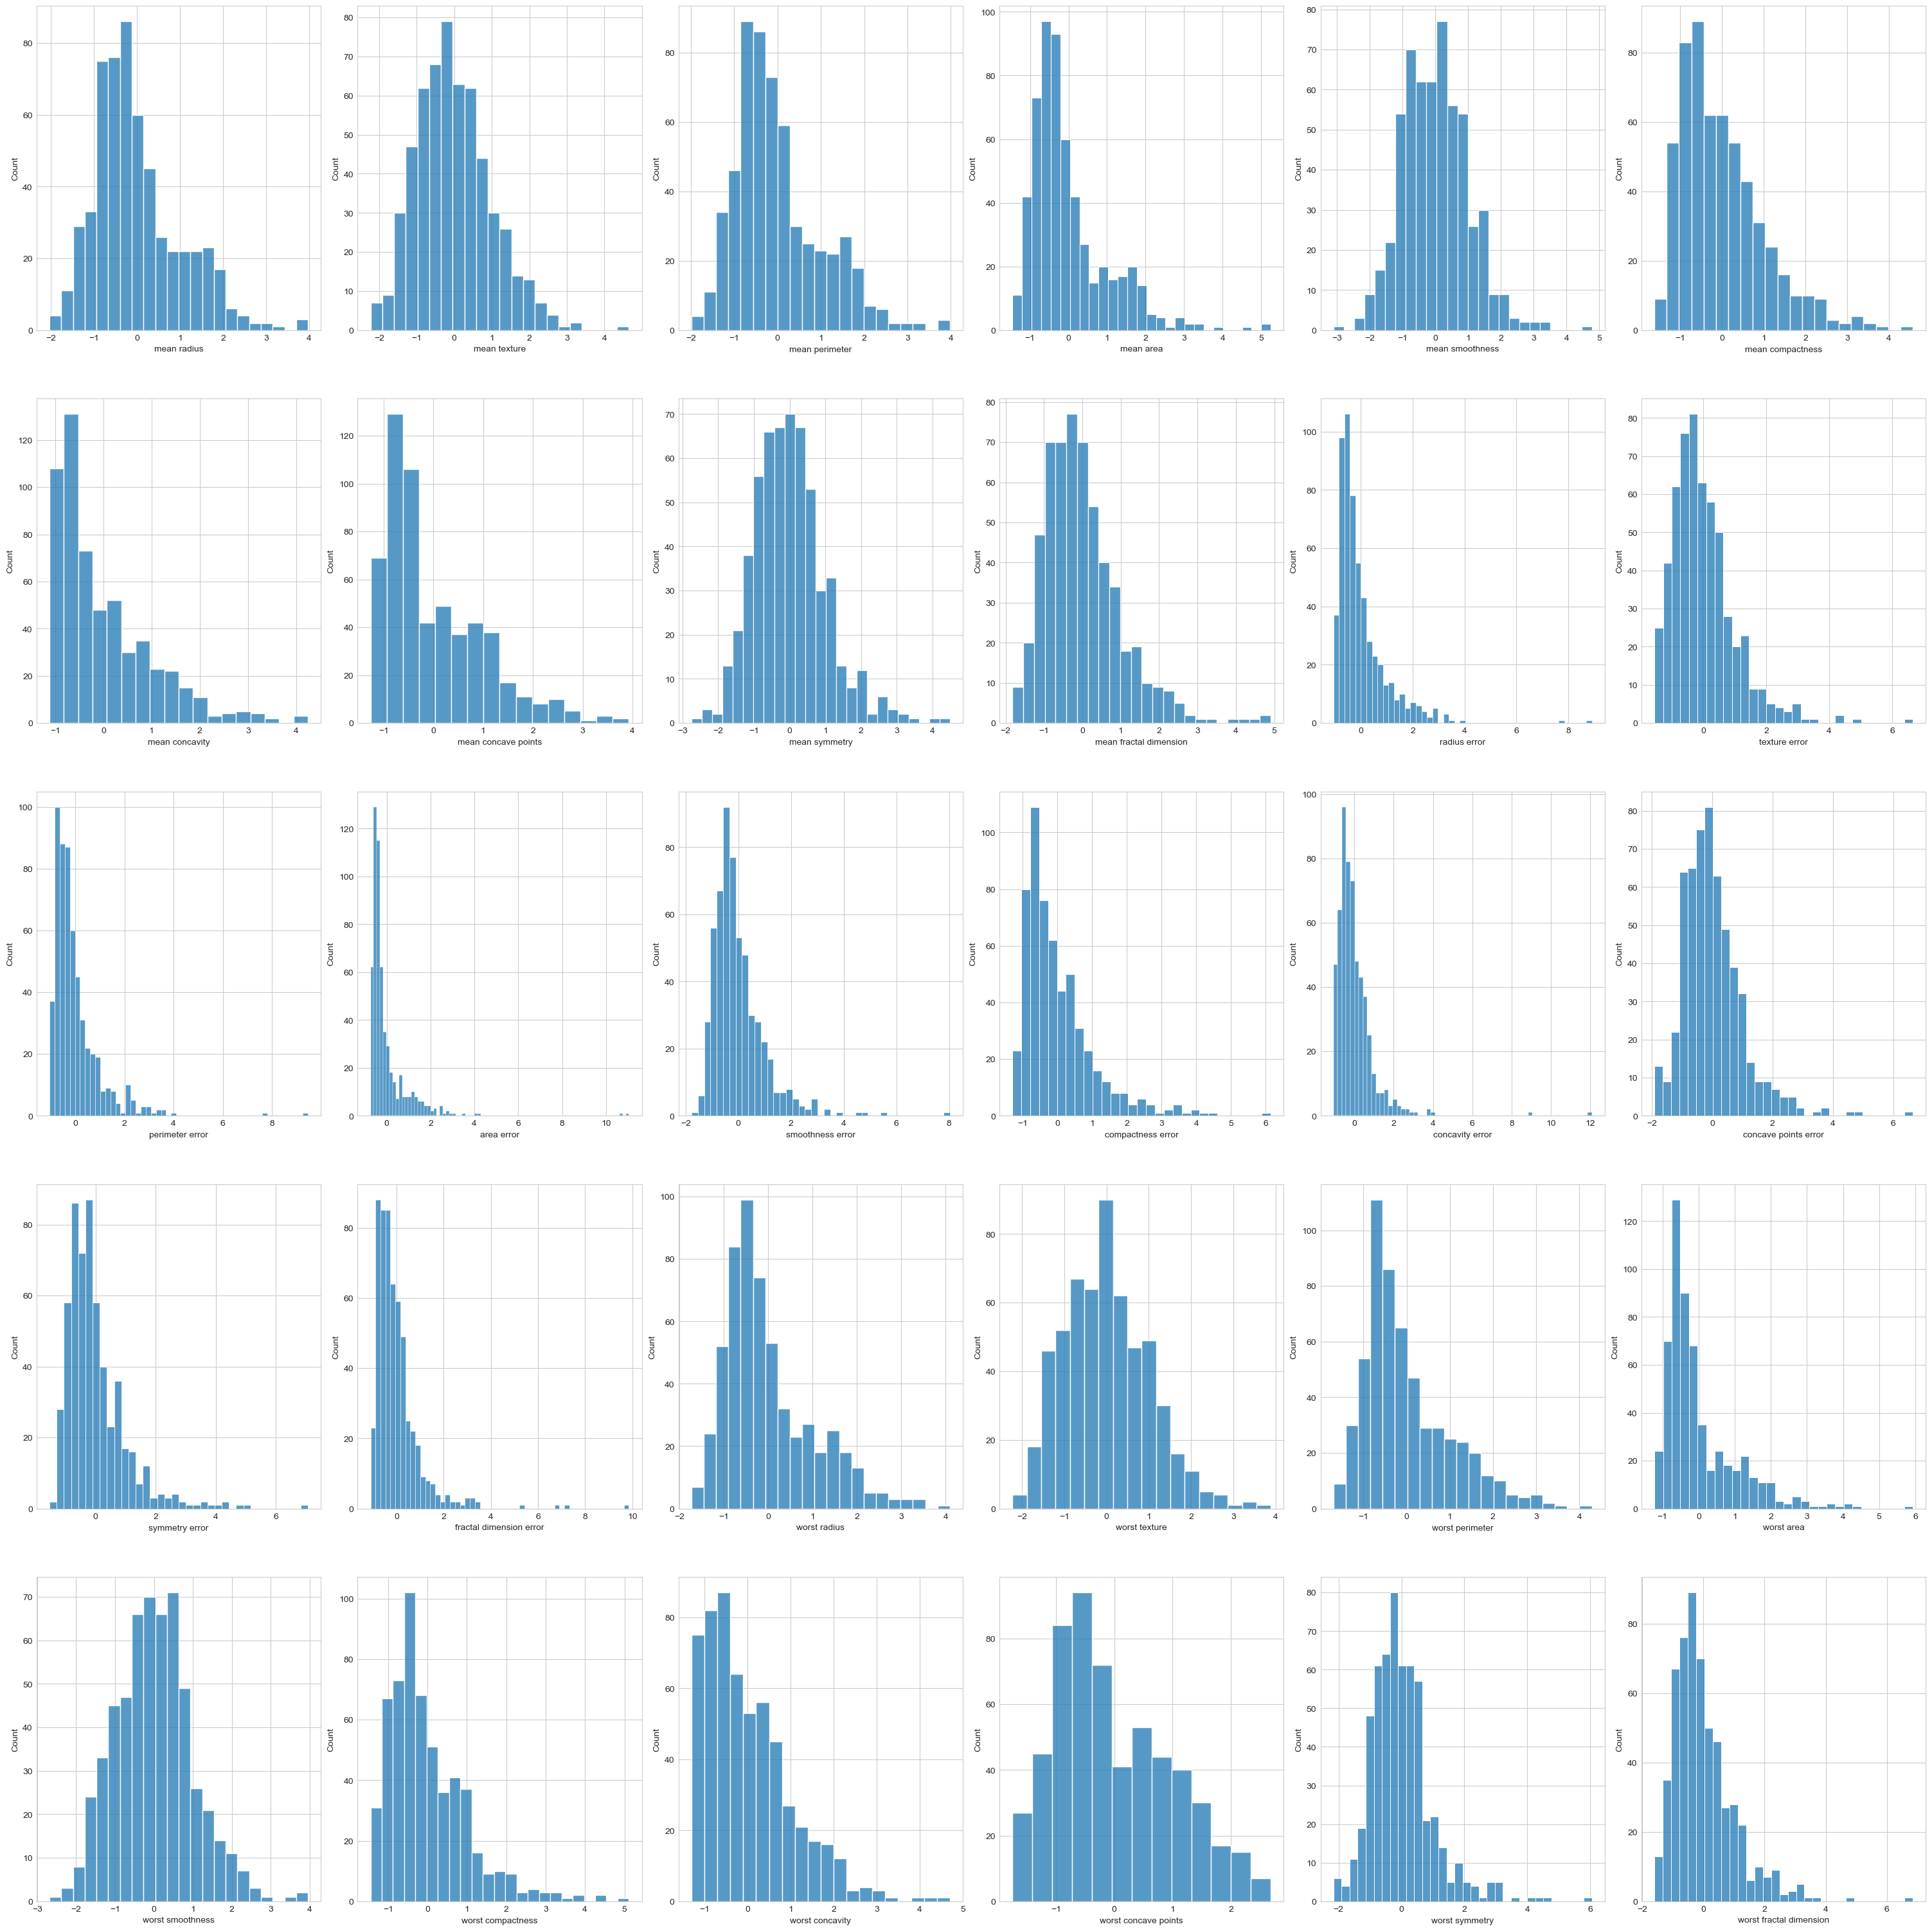

In [90]:
### check the distribution of all the columns
x=pd.DataFrame(data_d, columns=data_df.columns)
import seaborn as sns
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(30, 30))
index = 0
ax = ax.flatten()

for col in x.columns:
    if index<30:
        sns.histplot(x[col], ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Distribution of data 
1. some of the features look more or less a normal distribution  and some are skewed need some scaling as well. 
2. 37% is malignant and 63% is beningn cases in thd data
3. The mean value for most of the features are greater for Malignant (0) cases than the mean value for Benign(1) cases.

In [58]:
### getting the target column from the raw data
### check the counts of the classes
df_target = pd.DataFrame(data.target, columns=['target'])
df_target['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [59]:
### making it a new column now
data_df = pd.concat([data_df, df_target], axis=1)

In [60]:
### check dtype of all the columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [74]:
data_df['target'].unique()

array([0, 1])

Malignant percentage:  37.258347978910365 %
Benign percentage:  62.741652021089635 %


Text(0.5, 1.0, 'Malignant (0) vs Benign Data(1) points')

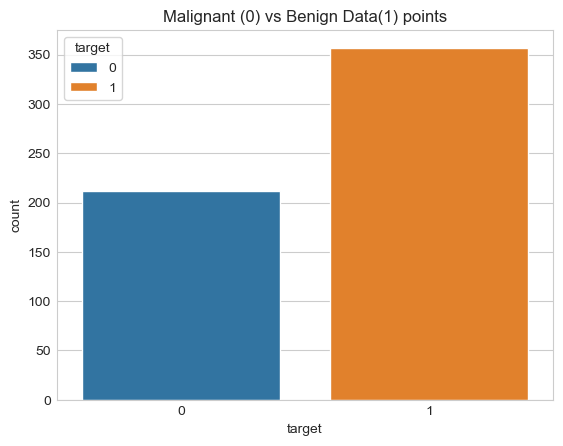

In [79]:
### Distribution of the target classes 
### 0 is malignant and 1 is benign
import seaborn as sns
print('Malignant percentage: ', len(data_df[data_df['target']==0])/len(data_df)*100, '%')
print('Benign percentage: ', len(data_df[data_df['target']==1])/len(data_df)*100, '%')
sns.countplot(data_df,x='target', legend=True, hue='target')
plt.xlabel("target")
plt.title("Malignant (0) vs Benign Data(1) points")

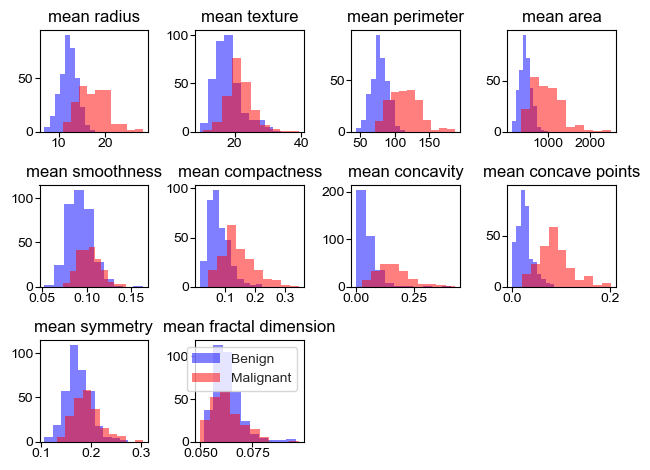

In [13]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

Ben = data_df[data_df['target']==1]
Mal = data_df[data_df['target']==0]
# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data_df.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
  
    ax.hist(Ben[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(Mal[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

# Summary

From the  distribution we have to see if features show different characteristics in the two categories of Benign and malignant cells. Mean radius , perimeter, area , concave points, concavity and compactness clearly show differences in the median of there distributions.
They can be good to use in the model.
Similarly radius error , perimeter error and area eerror show different distribution sin both the classes , gain good to be used
worts area, worst raius, wost concavepoints and some of the key features with significant change in distributions in both the categories 


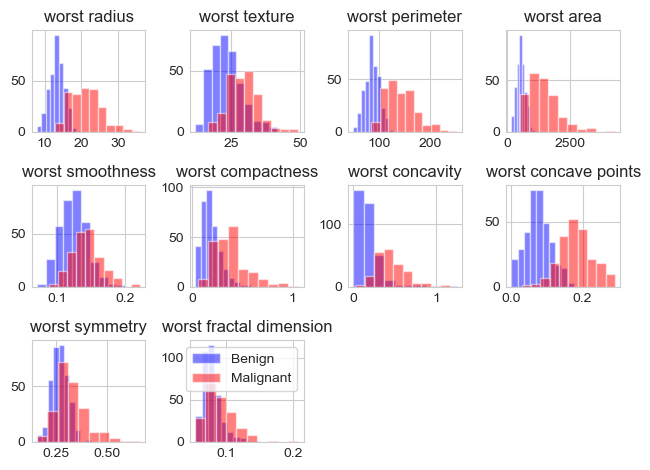

In [14]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

Ben = data_df[data_df['target']==1]
Mal = data_df[data_df['target']==0]
# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data_df.columns[20:30])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
  
    ax.hist(Ben[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(Mal[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

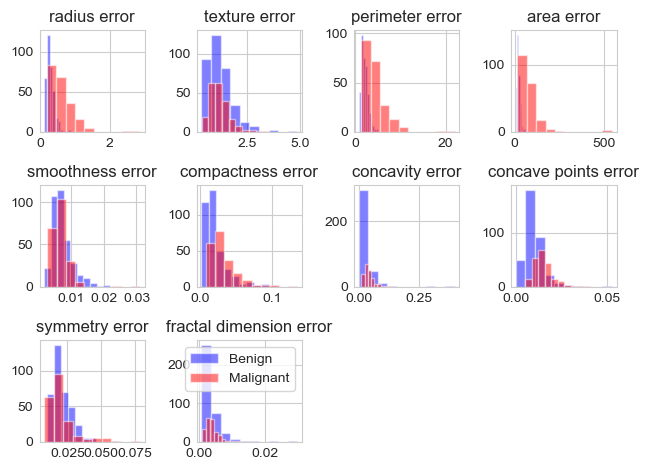

In [15]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

Ben = data_df[data_df['target']==1]
Mal = data_df[data_df['target']==0]
# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data_df.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
  
    ax.hist(Ben[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(Mal[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

## Percentiles & outlier Detetction
Percentiles talks about distribution of data tell you for example 25th percentile means 25 % of vale lies below this point and 75% of values lie above this point
according to box plots the features like perimetererror, area error  show skewness and outliers above the IQR.

In [16]:
## calulating percentiles
percentiles = [10,25, 50, 75, 90 , 99]

for i in data_df.columns:
    # Calculate percentiles using numpy.percentile
    percentile_values = np.percentile(data_df[i], percentiles)

    print(f" {i,percentiles}: {percentile_values}")

 ('mean radius', [10, 25, 50, 75, 90, 99]): [10.26   11.7    13.37   15.78   19.53   24.3716]
 ('mean texture', [10, 25, 50, 75, 90, 99]): [14.078 16.17  18.84  21.8   24.992 30.652]
 ('mean perimeter', [10, 25, 50, 75, 90, 99]): [ 65.83   75.17   86.24  104.1   129.1   165.724]
 ('mean area', [10, 25, 50, 75, 90, 99]): [ 321.6  420.3  551.1  782.7 1177.4 1786.6]
 ('mean smoothness', [10, 25, 50, 75, 90, 99]): [0.079654 0.08637  0.09587  0.1053   0.11482  0.132888]
 ('mean compactness', [10, 25, 50, 75, 90, 99]): [0.0497   0.06492  0.09263  0.1304   0.17546  0.277192]
 ('mean concavity', [10, 25, 50, 75, 90, 99]): [0.013686 0.02956  0.06154  0.1307   0.20304  0.351688]
 ('mean concave points', [10, 25, 50, 75, 90, 99]): [0.011158 0.02031  0.0335   0.074    0.10042  0.164208]
 ('mean symmetry', [10, 25, 50, 75, 90, 99]): [0.14958  0.1619   0.1792   0.1957   0.21494  0.259564]
 ('mean fractal dimension', [10, 25, 50, 75, 90, 99]): [0.055338  0.0577    0.06154   0.06612   0.072266  0.0854

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, 
first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, 
a vertical line is also there which goes through the box at the median.

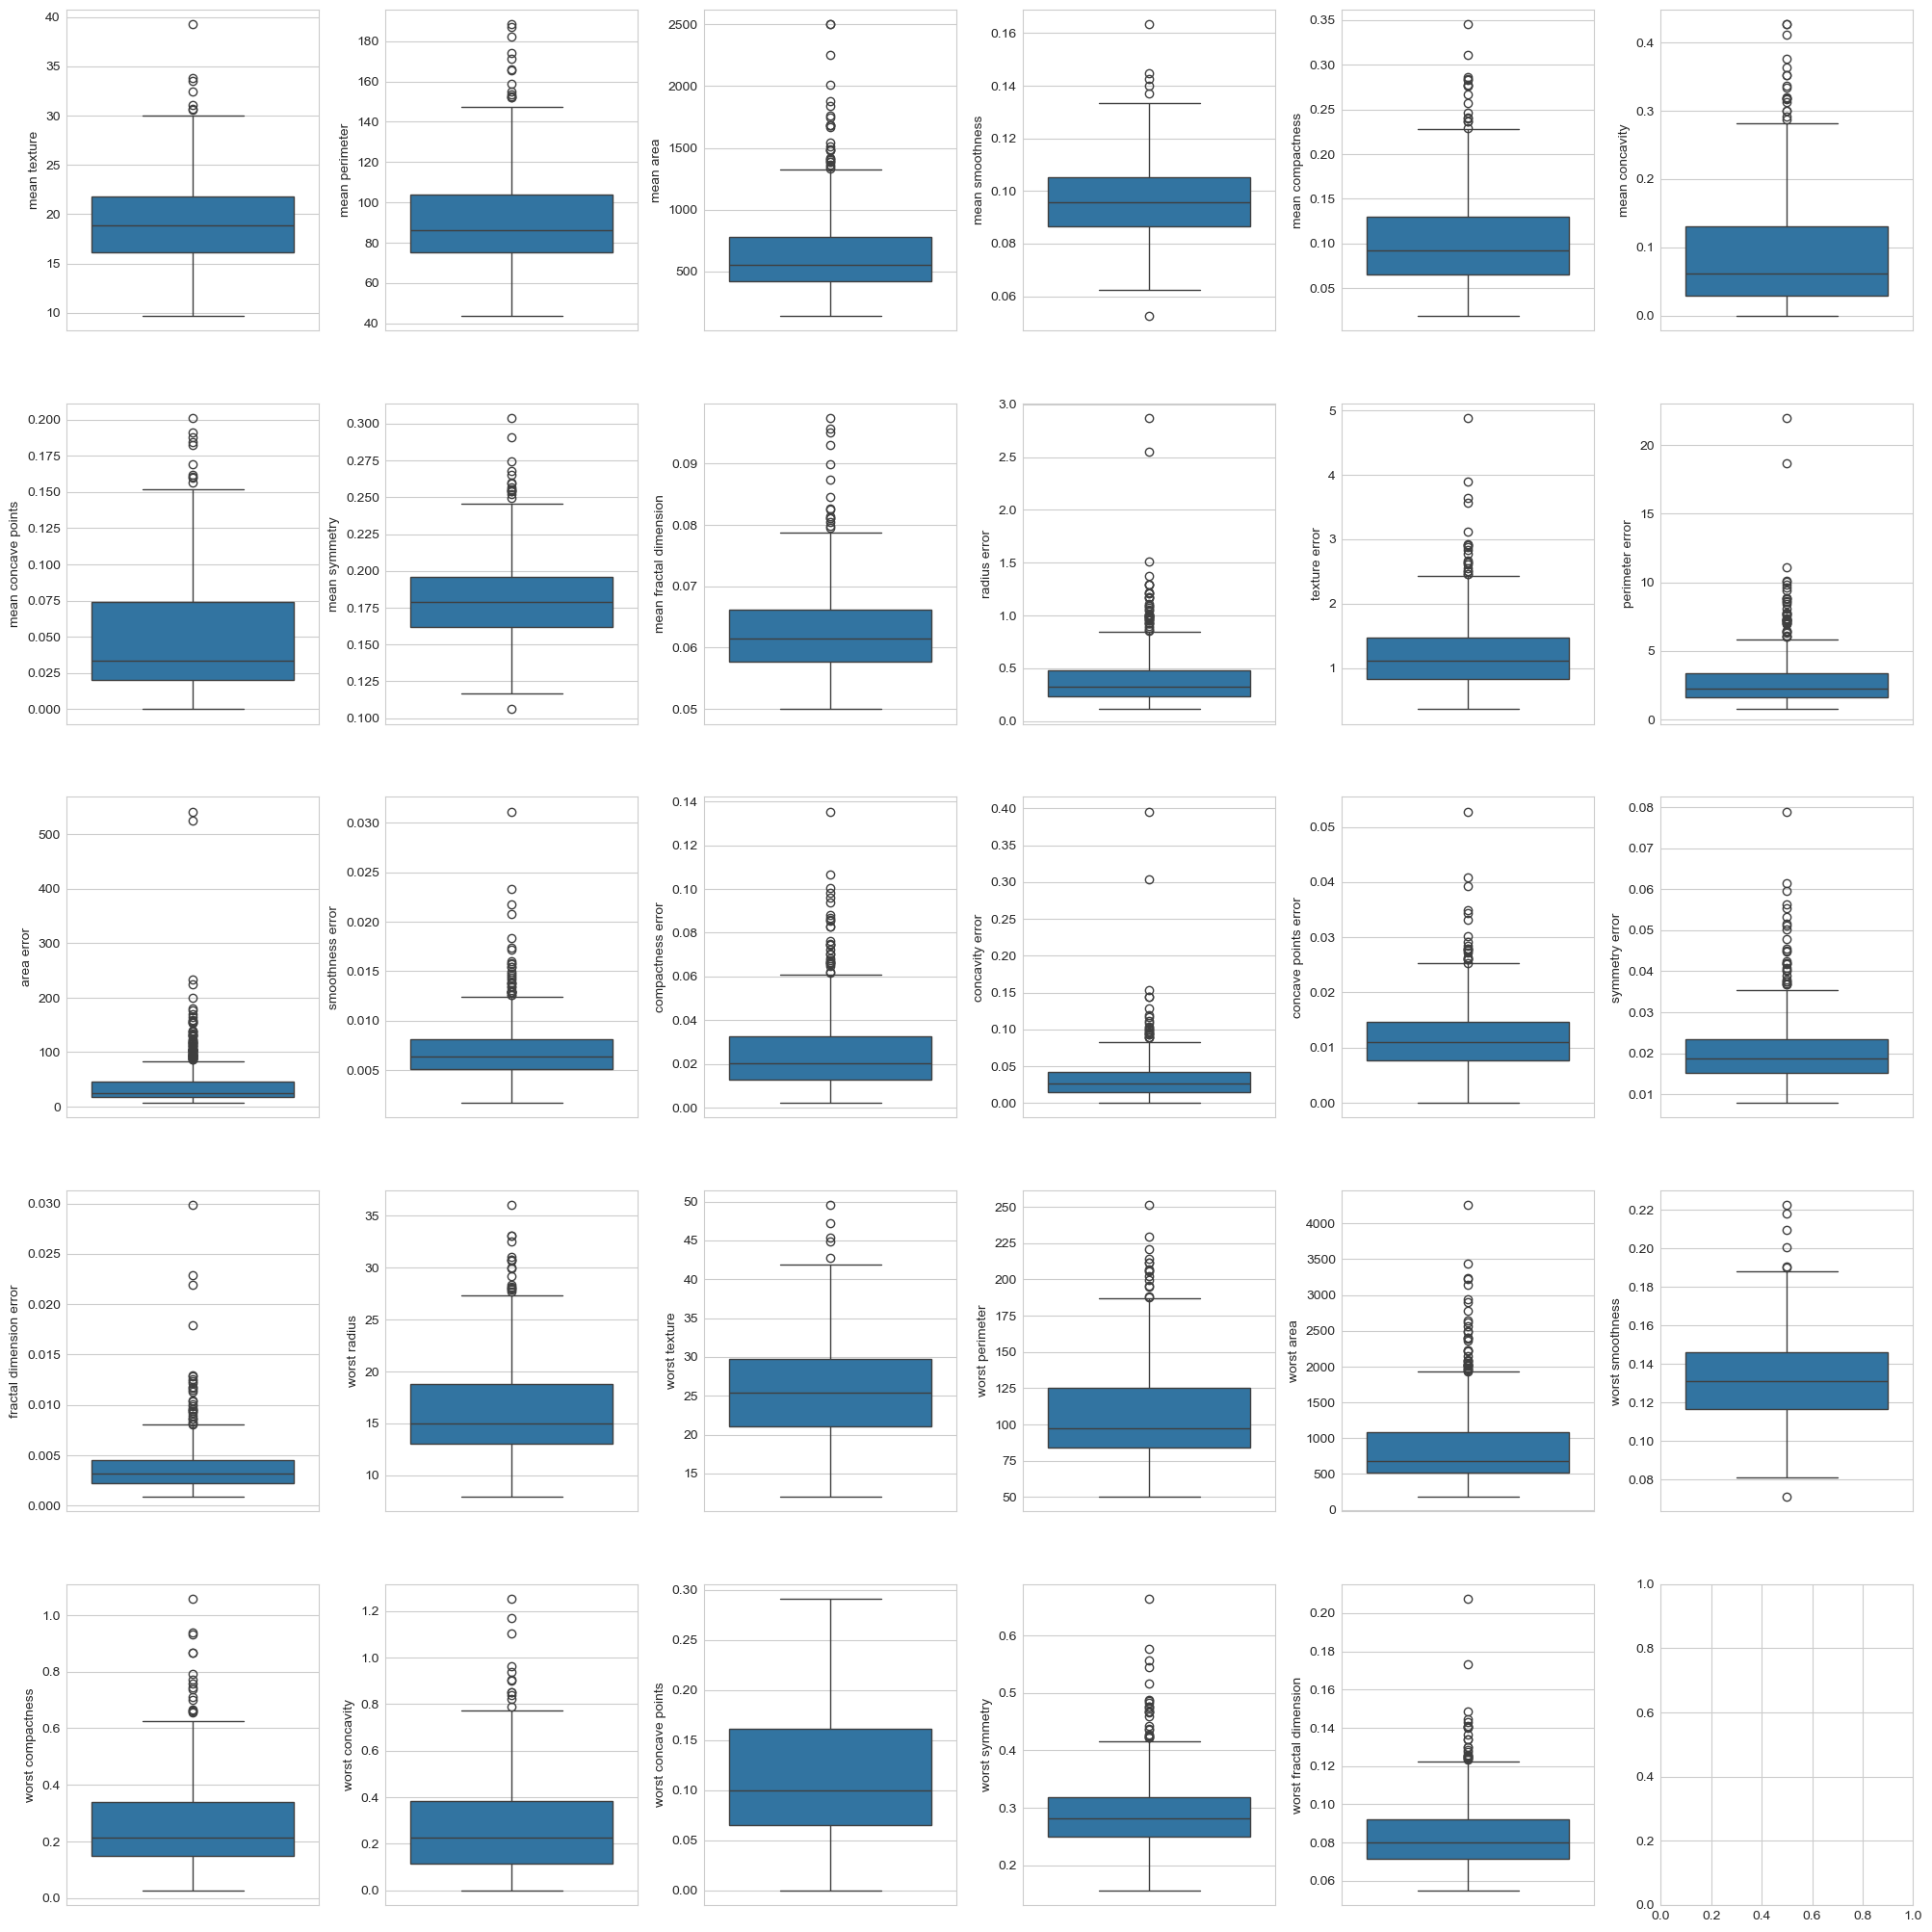

In [17]:
# create box plot
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data_df.columns[1:30]:
    sns.boxplot(y=col, data=data_df ,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
### to check outlier sin the data using Zscore
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    if len(outliers)>8:        
       return print("Total number of outliers are",len(outliers))
out_zscore(data_df['mean radius'])
#df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

In [19]:
for i in data_df.columns:
    print(i),out_zscore(data_df[i])

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
Total number of outliers are 9
mean concavity
Total number of outliers are 9
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
Total number of outliers are 9
perimeter error
area error
smoothness error
compactness error
Total number of outliers are 12
concavity error
concave points error
symmetry error
Total number of outliers are 11
fractal dimension error
Total number of outliers are 10
worst radius
worst texture
worst perimeter
worst area
Total number of outliers are 10
worst smoothness
worst compactness
Total number of outliers are 10
worst concavity
worst concave points
worst symmetry
Total number of outliers are 9
worst fractal dimension
Total number of outliers are 9
target


In [20]:
### to detect oultier using interquartile range
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    #print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    if df1.shape[0]+ df2.shape[0]>9:
     return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])


In [21]:
for i in data_df.columns:
    print(i),out_iqr(data_df,i)

mean radius
The lower bound value is 5.579999999999999
The upper bound value is 21.9
Total number of outliers are 14
mean texture
The lower bound value is 7.725000000000003
The upper bound value is 30.244999999999997
mean perimeter
The lower bound value is 31.775000000000013
The upper bound value is 147.49499999999998
Total number of outliers are 13
mean area
The lower bound value is -123.30000000000001
The upper bound value is 1326.3000000000002
Total number of outliers are 25
mean smoothness
The lower bound value is 0.057975
The upper bound value is 0.133695
mean compactness
The lower bound value is -0.03329999999999997
The upper bound value is 0.22861999999999996
Total number of outliers are 16
mean concavity
The lower bound value is -0.12215000000000001
The upper bound value is 0.28241000000000005
Total number of outliers are 18
mean concave points
The lower bound value is -0.060224999999999994
The upper bound value is 0.15453499999999998
Total number of outliers are 10
mean symmet

In [ ]:
from scipy import stats
# Calculate Z-Scores for 'medv' column
z_scores = np.abs(stats.zscore(data_df['area error']))

# Define a threshold for outliers
threshold = 3

# Identify and isolate outliers
outlier_indices = np.where(z_scores > threshold)
data_df_outlier_free = data_df['area error'].iloc[~outlier_indices]
print("Detected Outliers are:", outliers)

Detected Outliers are: 122    233.0
212    525.6
265    199.7
368    224.1
461    542.2
503    180.2
Name: area error, dtype: float64


## treatment for outlier by capping and knn

In [ ]:
#  Oulier treatment CAPPING

upper_limit = data_df['area error'].mean() + 3*data_df['area error'].std()
lower_limit = data_df['area error'].mean() - 3*data_df['area error'].std()

data_df['area error'] = np.where(
    data_df['area error'] > upper_limit,
    upper_limit,
    np.where(
        data_df['area error'] < lower_limit,
        lower_limit,
        data_df['area error']))

In [ ]:
### knn
from fancyimpute import KNN
def calculate_outliers(column):
    
    # Calculating 25th and 75th percentile.
    percentile25 = np.percentile(column,25)
    print("perctile 25",percentile25)
    percentile75 = np.percentile(column,75)
    print("percentile 75",percentile75)
    
    diff = percentile75 - percentile25
    
    lowerlimit = percentile25 - diff * 1.5
    upperlimit = percentile75 + diff * 1.5
    
    column[column<lowerlimit] = np.nan
    column[column>upperlimit] = np.nan
    
    return column
data_df['area error'] = calculate_outliers(data_df['area error'])

knn = KNN(k=3)
df = knn.fit_transform(data_df)
df = pd.DataFrame(data_df,columns=columns)


### Correlation between features and with target 
Features like mean radius, mean area, mean concavity and mean perimeter are highly correlated with each other (around 0.99).
features for mean cell dimension and worst cell dimension charecteristisc are correlated. mean radius , perimeter , area  is correlated , correation coeffectint more than >50% with worst radius , worst perimeter and area.
Compactness_mean, concavity_mean and concave points_mean are correlated with each other.
radius_eeror, perimeter_error and area_error are correlated with each other
Compactness_worst, concavity_worst and concave
Compactness_error, concavity_error and concave points_error
texture_mean and texture_worst 
area_worst and area_mean


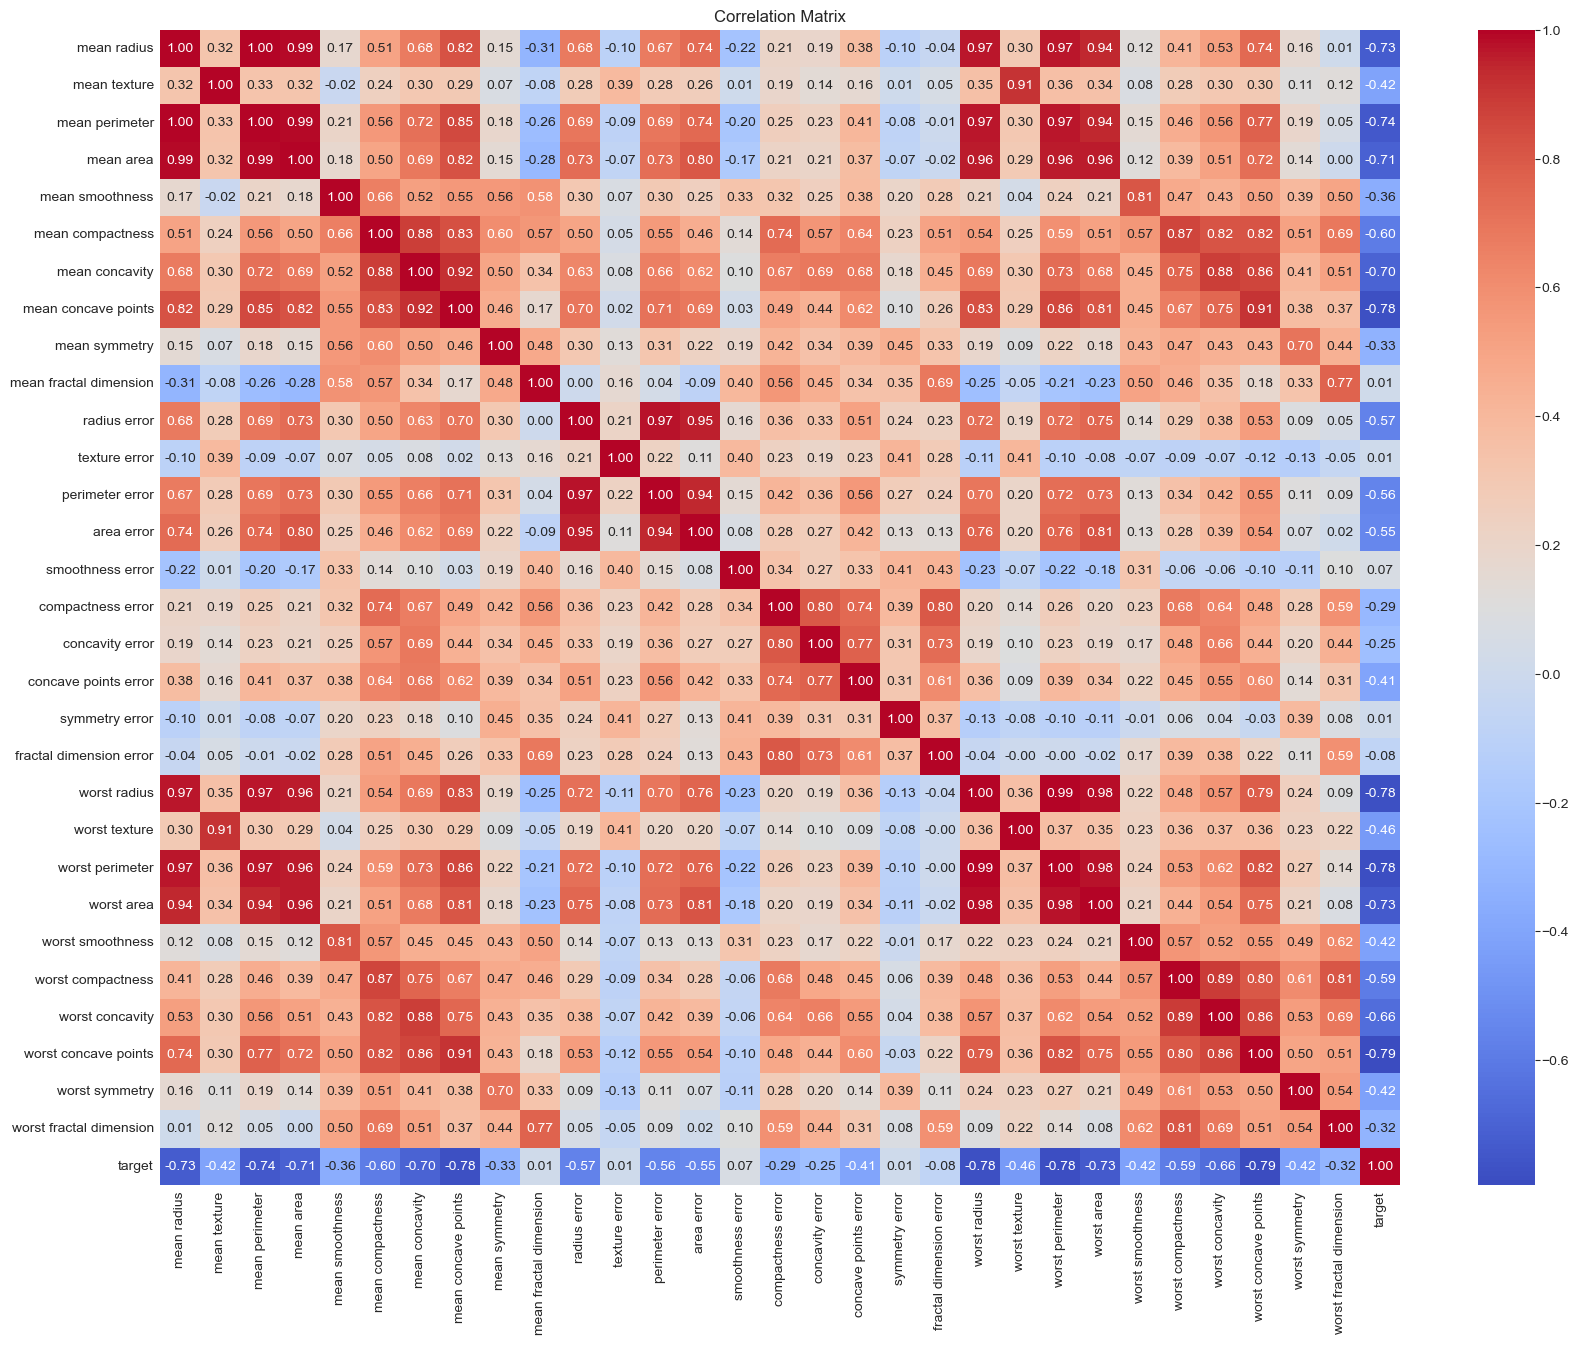

In [22]:
### heat map of correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = data_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

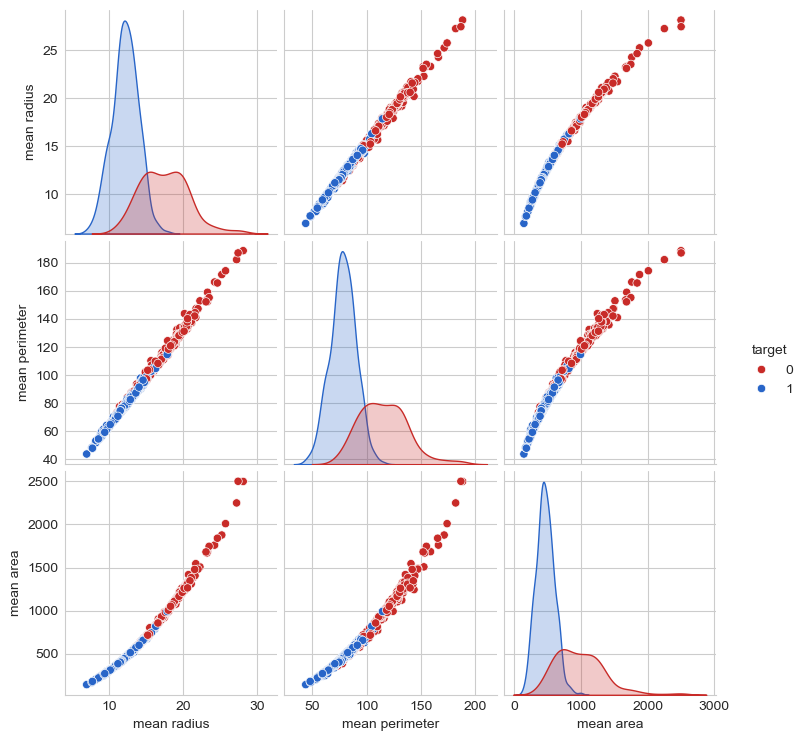

In [23]:
### scatter plots of the few features that are correlated
sns.pairplot(
    data_df,
    vars=['mean radius', 'mean perimeter', 'mean area'],
    hue='target',
    palette={
        1: '#2865c8',
        0: '#c82b28'
    })

plt.show()

## VIF for feature selection

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcVifDf(df,features):
  col_vif = [] # placeholder to store the vif values
  for i in range(len(features)):
    vif = variance_inflation_factor(df[features],i)
    col = features[i]
    col_vif.append((col,vif))
  vif_df = pd.DataFrame(data=col_vif,columns=['Feature','VIF'])
  return vif_df
calcVifDf(data_df ,data_df.columns)

,Feature,VIF
0,mean radius,63955.019898
1,mean texture,251.093672
2,mean perimeter,58213.349861
3,mean area,1320.282793
4,mean smoothness,393.418392
5,mean compactness,200.983909
6,mean concavity,158.033586
7,mean concave points,155.053368
8,mean symmetry,184.712502
9,mean fractal dimension,683.379907


C:\Users\anuja\AppData\Local\Temp\ipykernel_28928\3140319748.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlations_malignant_sorted.index, x=correlations_malignant_sorted.values, palette="coolwarm", orient='h')


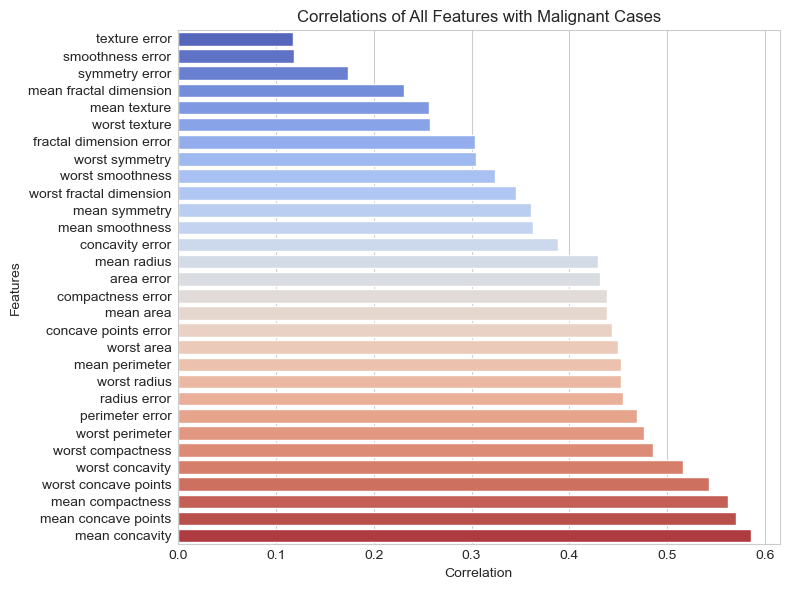

In [24]:
## create dataframe copy 
df_res = data_df

# Drop the 'target' column
df_res = df_res.drop(columns=['target'])

# Calculating the correlation matrix for malignant cases
correlation_matrix_malignant = df_res.corr()

# Sorting the correlations with the mean correlation of all features
correlations_malignant_sorted = correlation_matrix_malignant.mean().sort_values()
# Plotting for malignant cases
plt.figure(figsize=(8,6))
sns.barplot(y=correlations_malignant_sorted.index, x=correlations_malignant_sorted.values, palette="coolwarm", orient='h')
plt.title("Correlations of All Features with Malignant Cases")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## preparing for modelling 
1) Feature selection using correaktion coefficient before the test train split 
1) scaling with two method standar scaler (uses z score) and min max scaling
3) Model fiiting 
4) Printing accuarcy  metrics 
5) Best model parameter selection using random search hyperparameter tuning method

In [25]:
correlations_malignant_sorted.sort_values( ascending=False)[:26]

mean concavity             0.585639
mean concave points        0.569598
mean compactness           0.561868
worst concave points       0.542356
worst concavity            0.516236
worst compactness          0.485073
worst perimeter            0.476225
perimeter error            0.468874
radius error               0.455001
worst radius               0.453103
mean perimeter             0.452404
worst area                 0.449743
concave points error       0.443861
mean area                  0.437958
compactness error          0.437833
area error                 0.431447
mean radius                0.428924
concavity error            0.388227
mean smoothness            0.363011
mean symmetry              0.360899
worst fractal dimension    0.345684
worst smoothness           0.323878
worst symmetry             0.304131
fractal dimension error    0.303829
worst texture              0.257614
mean texture               0.256457
dtype: float64

In [95]:
from sklearn.model_selection import train_test_split
y = data_df['target']
cols=['mean concavity','mean concave points','mean compactness','worst concave points',
'worst concavity','worst compactness','worst perimeter','perimeter error','radius error',
'worst radius','mean perimeter','worst area','concave points error','mean area','compactness error' ,'area error','mean radius']
x = data_df.drop('target',axis=1)
x = x[cols]

 


print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)




     

(569, 17)
(569,)
(426, 17)
(426,)
(143, 17)
(143,)


In [27]:
## scaling the features standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
## scaling the features minmax scaler
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.fit_transform(x_test)

# Modelling
1) Features are selected based on the correalation coefficient 
2) scaling two methods are used before modelling 
3) Logistic regression , random forest and xgboost are used for modelling
4) looking at recall here matters due to slightly imbalanced dataset and also cost of False negative in cancer detection is of utmost imp so we are lookign at recall. Random forest classifier works well with 97% of recall also after tuning the model with random search does not improve the model quality 


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

# creating the model
modellr = LogisticRegression()

# feeding the training data into the model
modellr.fit(x_train, y_train)

# predicting the test set results
y_pred = modellr.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", modellr.score(x_train, y_train))
print("Testing accuarcy :", modellr.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_prob_lr = modellr.predict_proba(x_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

Training accuracy : 0.9389671361502347
Testing accuarcy : 0.958041958041958
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.95      0.99      0.97        91

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

[[47  5]
 [ 1 90]]


In [30]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_prob_RF = model.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_RF)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_RF)


Training accuracy : 1.0
Testing accuarcy : 0.9440559440559441
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        52
           1       0.92      1.00      0.96        91

    accuracy                           0.94       143
   macro avg       0.96      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143

[[44  8]
 [ 0 91]]


In [35]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", xgb_model.score(x_train, y_train))
print("Testing accuarcy :", xgb_model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_prob_xb = xgb_model.predict_proba(x_test)[:,1]
fpr_xb, tpr_xb, thresholds_xb = roc_curve(y_test, y_pred_prob_xb)
roc_auc_xb = auc(fpr_xb, tpr_xb)
precision_xb, recall_xb, th_xb = precision_recall_curve(y_test, y_pred_prob_xb)


Training accuracy : 1.0
Testing accuarcy : 0.972027972027972
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        52
           1       0.96      1.00      0.98        91

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

[[48  4]
 [ 0 91]]


In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'reg_alpha':[0,0.5,1],
    'reg_lambda':[0.5,1,5],
    'booster':['gbtree','gblinear']
}



grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective="binary:logistic", random_state=42),
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(x_train, y_train)


Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=10,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40),
                         'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.5, 1, 5]},
             scoring='roc_auc', verbose=True)

In [45]:
grid_search.best_params_

best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(x_test)
# classification report
print("Training accuracy :", best_estimator.score(x_train, y_train))
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9882629107981221
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        52
           1       0.92      1.00      0.96        91

    accuracy                           0.94       143
   macro avg       0.96      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143

[[44  8]
 [ 0 91]]


In [46]:
y_pred_prob_xgbt = grid_search.predict_proba(x_test)[:,1]
fpr_xgbt, tpr_xgbt, thresholds_xgbt = roc_curve(y_test, y_pred_prob_xgbt)
roc_auc_xgbt = auc(fpr_xgbt, tpr_xgbt)
precision_xgbt, recall_xgbt, th_xgbt = precision_recall_curve(y_test, y_pred_prob_xgbt)

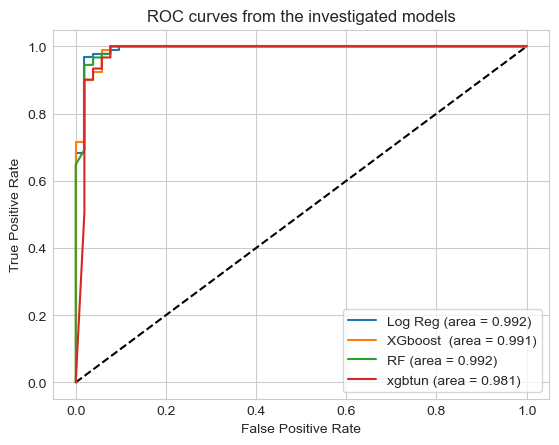

In [47]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_xb, tpr_xb, label='XGboost  (area = %0.3f)' % roc_auc_xb)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xgbt, tpr_xgbt, label='xgbtun (area = %0.3f)' % roc_auc_rft)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()